In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
df = pd.read_csv('customer_shopping_data.csv')

In [4]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


###INFORMATION###

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [6]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [7]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


###DATA CLEANING###


In [8]:
df.isna()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
99452,False,False,False,False,False,False,False,False,False,False
99453,False,False,False,False,False,False,False,False,False,False
99454,False,False,False,False,False,False,False,False,False,False
99455,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [10]:
numerics = ['int16','float16','float32','float64']
numeric_df=df.select_dtypes(include=numerics)
len(numeric_df.columns)

1

In [11]:
mall = df.shopping_mall.unique()
len(mall)

10

In [12]:
quant = df.quantity.value_counts()
quant

quantity
3    20149
5    19990
2    19828
1    19767
4    19723
Name: count, dtype: int64

###DATA VISUALIZATION###

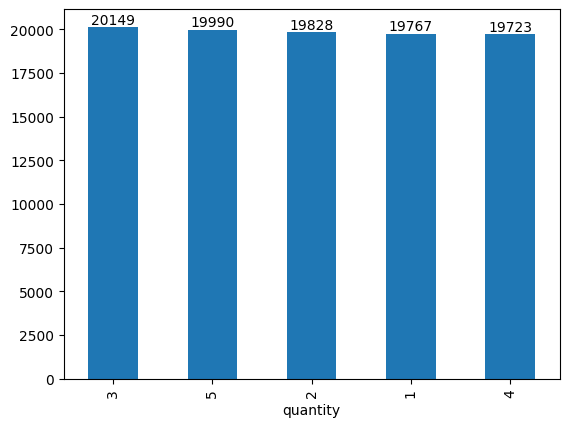

In [13]:
ax=quant.plot(kind='bar')
for bars in ax.containers:
    ax.bar_label(bars)

In [14]:
mall = df.shopping_mall.value_counts()
mall

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

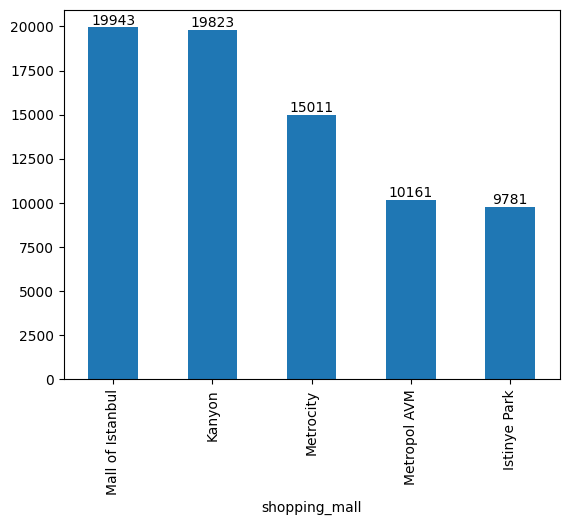

In [15]:
ax=mall[:5].plot(kind='bar')
for bars in ax.containers:
    ax.bar_label(bars)

In [16]:
shopping_mall=df.shopping_mall
shopping_mall


0                  Kanyon
1          Forum Istanbul
2               Metrocity
3            Metropol AVM
4                  Kanyon
               ...       
99452              Kanyon
99453      Forum Istanbul
99454           Metrocity
99455        Istinye Park
99456    Mall of Istanbul
Name: shopping_mall, Length: 99457, dtype: object

In [17]:
df.price[:10]

0    1500.40
1    1800.51
2     300.08
3    3000.85
4      60.60
5    1500.40
6      40.66
7     600.16
8     900.24
9     600.16
Name: price, dtype: float64

In [18]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

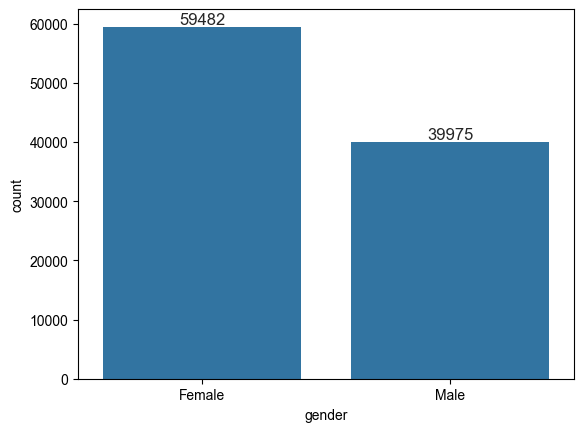

In [19]:
ax=sns.countplot(x='gender',data=df)
sns.set(rc={'figure.figsize':(20,5)})

for bars in ax.containers:
    ax.bar_label(bars)

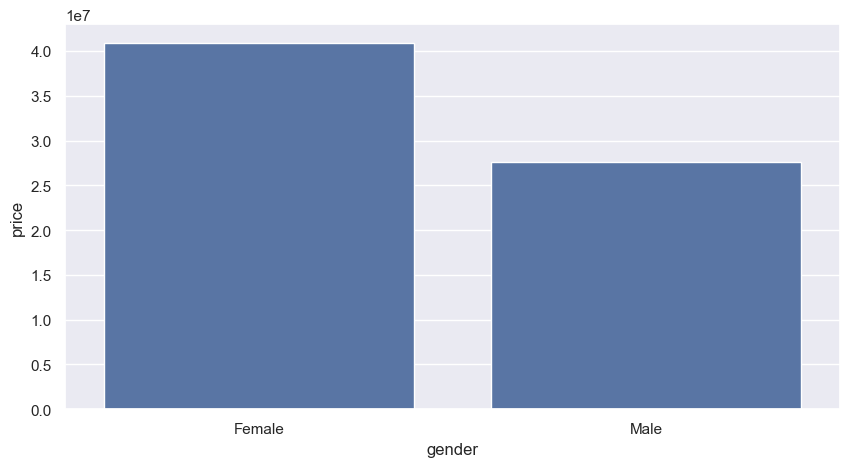

In [20]:
price_1= df.groupby(['gender'],as_index=False)['price'].sum().sort_values(by='price',ascending=False).head(5)

sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='gender',y='price',data= price_1)

for bars in ax.containers:
    ax.bar_label(bars)

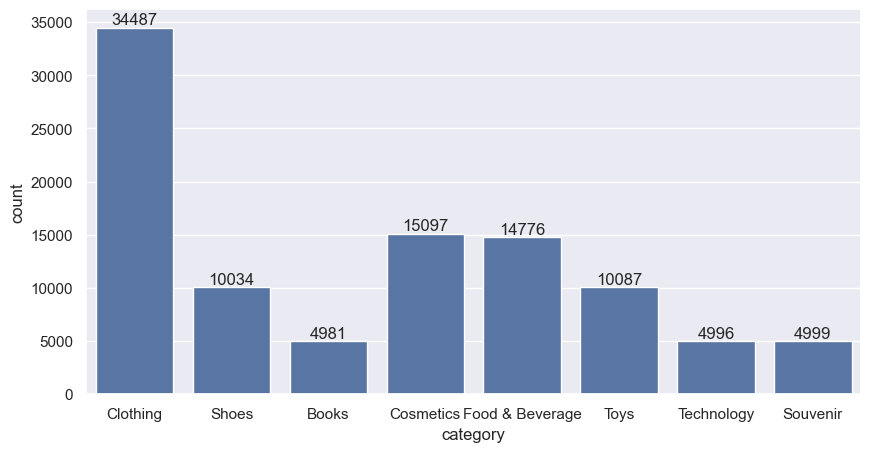

In [21]:
ax=sns.countplot(x='category',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

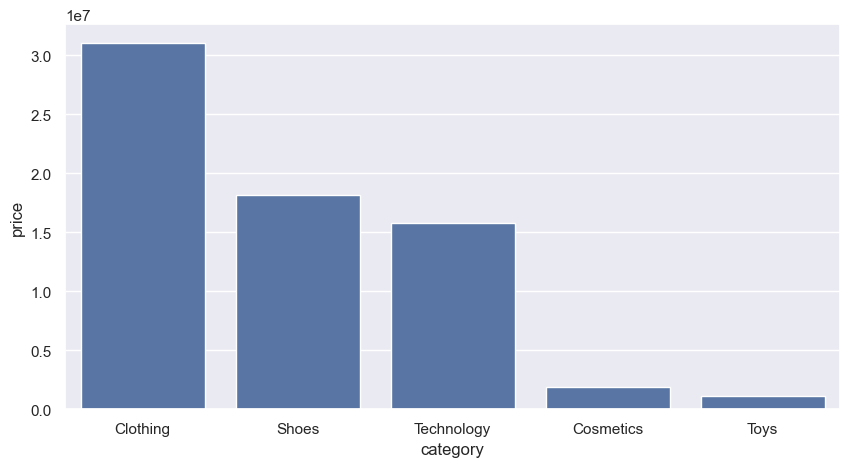

In [22]:
price_1= df.groupby(['category'],as_index=False)['price'].sum().sort_values(by='price',ascending=False).head(5)

sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='category',y='price',data= price_1)
plt.show()

In [23]:
age_1=[0,18,25,35,45,55,65,75]
age_labels=['0-18','19-25','26-35','36-45','46-55','56-65','66-75']
df['age_group']=pd.cut(df['age'], bins=age_1,labels=age_labels)

C:\Users\Dell\AppData\Local\Temp\ipykernel_11884\3065427727.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales =df.groupby('age_group')['price'].sum()


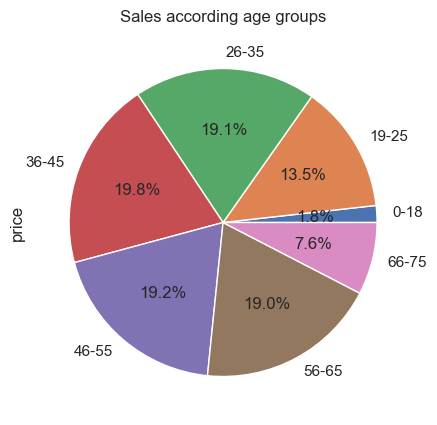

In [24]:
age_sales =df.groupby('age_group')['price'].sum()
age_sales.plot(kind='pie',title='Sales according age groups' ,autopct='%1.1f%%')
plt.show()

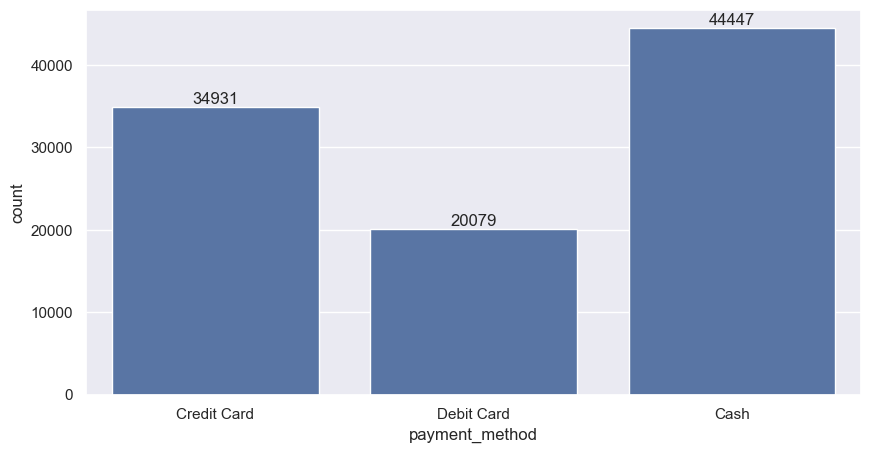

In [25]:
ax=sns.countplot(x='payment_method',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [27]:
###POINTS TO BE NOTED AND SUGGESTIONS BASED ON THE EDA ON THE DATASET ARE:-

#1 ->> CASH SPENDING IS HIGH THAN CREDIT AND DEBIT CARDS SO BY GIVING ATTRACTIVE OFFERS CAN GIVE BETTER RESULTS
#2 ->> OUR TARGET AUDIENCE ON THE BASIS OF AGE GROUP IS SOMEWHERE BETWEEN 25-65 SO MARKETING CAN BE DONE ACCORDINGLY
#3 ->> THE TOP 3 CATEGORY SPENDING BY PEOPLE ARE CLOTHING ,SHOES AND TECHNOLOGY SO MARKETING CAMPAIGNS CAN BE RUN ACCORDINGLY
#4 ->> PRODUCT DIVERSIFICATION CAN BE DONE ACCORDING TO THE GENDER BY INCREASING FEMALE CUSTOMER ENGAGEMENT.